# Model Comparison

In this notebook we will create several new subreddit prediction models and systematically compare them.

While looking at new models we want to answer the following questions:
- What auxiliary information is important?
- Are different tokenizers better?
- How many words are needed in our Bag-of-Words?
- Do different classification algorithms (XGBoost, Support Vector Machine, Multinomial Logistic Regression, Random Forest)?
- Do more advanced embedding algorithms such as Averaged Word2Vec or Doc2Vec work better?

Obviously the first thing we need to do is load the data

In [319]:
import pandas as pd

#df = pd.read_csv('reddit_data.csv').set_index('id')
df_raw = pd.read_csv('reddit_data.csv')#.set_index('id')

df_raw

,id,title,subreddit
0,t93ec3,This subreddit is closed for new posts and com...,announcements
1,pg006s,COVID denialism and policy clarifications,announcements
2,pbmy5y,"Debate, dissent, and protest on Reddit",announcements
3,nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements
4,mi01fg,Second,announcements
...,...,...,...
9456,10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole
9457,10mvlnr,AITA for lashing out at my parents?,AmItheAsshole
9458,10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole
9459,10mvix4,WIBTA if I cancelled a vacation weekend becaus...,AmItheAsshole



## Classes

In order to improve the results I need to test a lot of models. In a separate notebook I've created three classes to help with that. This will organize the information better.

In [320]:
%run Classes.ipynb

In [321]:
obj = Subreddit_Predictor()
obj.add_data(df_raw)
obj.ready_data()

Obviously the first thing we need to do is load the data

In [322]:
import pandas as pd

#df = pd.read_csv('reddit_data.csv').set_index('id')
df_raw = pd.read_csv('reddit_data.csv')#.set_index('id')

df_raw

,id,title,subreddit
0,t93ec3,This subreddit is closed for new posts and com...,announcements
1,pg006s,COVID denialism and policy clarifications,announcements
2,pbmy5y,"Debate, dissent, and protest on Reddit",announcements
3,nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements
4,mi01fg,Second,announcements
...,...,...,...
9456,10mvmxu,WIBTA if I planned and threw a St. Patty’s par...,AmItheAsshole
9457,10mvlnr,AITA for lashing out at my parents?,AmItheAsshole
9458,10mvlgl,AITA for not wanting to spend time with my wif...,AmItheAsshole
9459,10mvix4,WIBTA if I cancelled a vacation weekend becaus...,AmItheAsshole



## Classes

In order to improve the results I need to test a lot of models. In a separate notebook I've created three classes to help with that. This will organize the information better.

In [323]:
%run Classes.ipynb

In [324]:
obj = Subreddit_Predictor()
obj.add_data(df_raw)
obj.ready_data()

We also need to load the results from the previous notebook into this object. We can then compare our results to see improvements.

In [325]:
import pickle as pkl

with open ("human_results.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Results.loc['Human'] = data

with open ("naive_results.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Results.loc['Naive'] = data

with open ("naive_results_mean.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Cross_Validation_Results_avg.loc['Naive'] = data

with open ("naive_results_std.pkl", 'rb') as f:
    data = pkl.load(f)
obj.Cross_Validation_Results_std.loc['Naive'] = data



These results represent the Individual Recall Scores and the Total Accuracy Score of attempting the classify subreddits by hand, "Human", and using a naive Bag-of-Words with Random Forrest mode, "Naive".

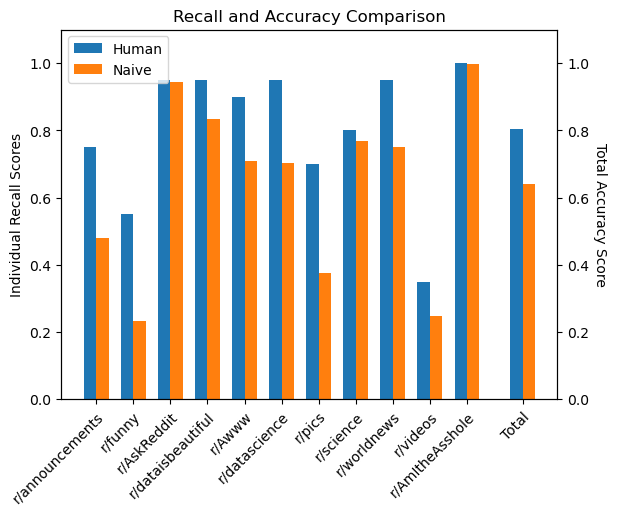

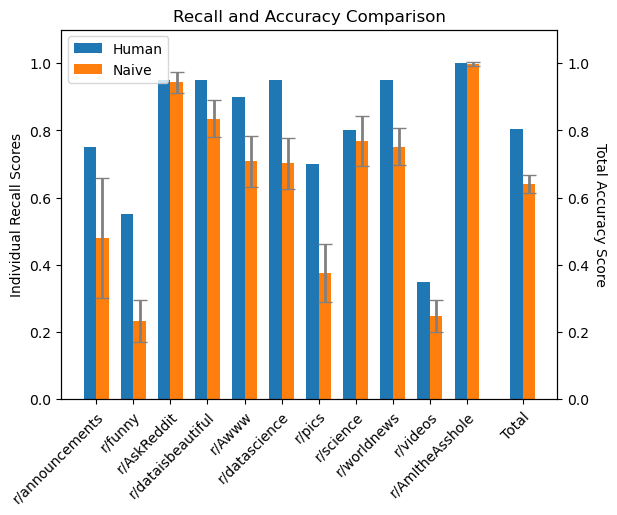

In [326]:
obj.compare(['Human', 'Naive'])
obj.compare(['Human', 'Naive'], error_bars=True)


In [327]:
obj.Y_test.value_counts()

2     195
8     193
1     193
7     193
5     190
10    188
0     188
4     186
6     170
9     164
3      33
Name: subreddit_num, dtype: int64

In [328]:
obj.Y_train.value_counts()

2     778
7     774
1     770
8     770
5     762
0     754
10    750
4     742
6     679
9     657
3     132
Name: subreddit_num, dtype: int64

In [329]:
np.bincount(obj.Y_test)

array([188, 193, 195,  33, 186, 190, 170, 193, 193, 164, 188], dtype=int64)

In [330]:
np.bincount(obj.Y_train)

array([754, 770, 778, 132, 742, 762, 679, 774, 770, 657, 750], dtype=int64)